In [42]:
from phidl import Device, Layer, LayerSet, Group
from phidl.device_layout import DeviceReference
from phidl import quickplot as qp

import phidl.geometry as pg
import phidl.utilities as pu
import phidl.routing as pr
import phidl.path as pp

import numpy as np
import pickle

from dataclasses import dataclass, field, replace

from typing import Tuple, Optional

import itertools

In [43]:
import importlib

from components import spiral
importlib.reload(spiral)

from components.default_layerset import default_ls
from components.spiral import Spiral, SpiralParams

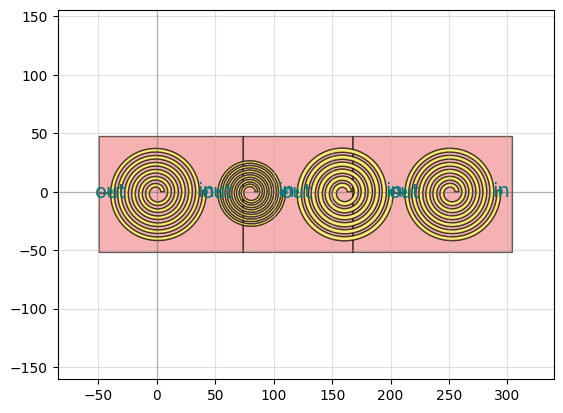

In [44]:
Optical_Dosetest = Device()

# make spirals
N = 6
ps = [6,4,6,6]
ws = [3,2,3.5,3.2]


spirals: Group = Group()

for p,w in zip(ps,ws):
    spiral = Spiral()
    spiral.generate_spiral(SpiralParams(N=N, w=w, p=p))

    spirals += Optical_Dosetest << spiral.device

spirals.distribute(direction = 'x', spacing = 10, separation = True)

Box = pg.offset(pg.bbox(bbox = Optical_Dosetest.bbox), distance=10, layer=default_ls['optical'])

Optical_Dosetest << pg.boolean(Box, Optical_Dosetest, operation='A-B', layer=default_ls['optical'])

qp(Optical_Dosetest)

In [45]:
Optical_Dosetest.write_gds('Optical_Dosetest.gds')

'Optical_Dosetest.gds'